In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data = pd.read_csv("/globalterrorismdb_0718dist.csv",encoding="latin1")

<ipython-input-14-734b808234f2>:1: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/globalterrorismdb_0718dist.csv",encoding="latin1")


In [16]:
df=pd.DataFrame(data)
print("data has been Succeffuly imported")
df.head()

data has been Succeffuly imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Columns: 135 entries, eventid to related
dtypes: float64(74), int64(7), object(54)
memory usage: 14.7+ MB


In [18]:
df.shape

(14259, 135)

In [19]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [20]:
for i in df.columns:
  print(i,end=" , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

**Cleaning DATA**

In [21]:
df=df[[ "iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","gname","motive",
         "nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,gname,motive,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,NaN,NaN,NaN


In [25]:

df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"State","city":"City","latitude":"Latitude","attacktype1_txt":"Attack Type","gname":"Group Name",
           "nkill":"Killed","nwound":"Wounded"},inplace=True)

In [27]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,longitude,location,summary,Attack Type,Group Name,motive,Killed,Wounded,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,MANO-D,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),23rd of September Communist League,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Unknown,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Unknown,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         14259 non-null  int64  
 1   Month        14259 non-null  int64  
 2   Day          14259 non-null  int64  
 3   Country      14259 non-null  object 
 4   Region       14259 non-null  object 
 5   State        14195 non-null  object 
 6   City         14258 non-null  object 
 7   Latitude     13772 non-null  float64
 8   longitude    13772 non-null  float64
 9   location     586 non-null    object 
 10  summary      913 non-null    object 
 11  Attack Type  14258 non-null  object 
 12  Group Name   14258 non-null  object 
 13  motive       647 non-null    object 
 14  Killed       12175 non-null  float64
 15  Wounded      10792 non-null  float64
 16  addnotes     669 non-null    object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.8+ MB


In [30]:
df.shape

(14259, 17)

In [31]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State             64
City               1
Latitude         487
longitude        487
location       13673
summary        13346
Attack Type        1
Group Name         1
motive         13612
Killed          2084
Wounded         3467
addnotes       13590
dtype: int64

In [34]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]


In [35]:
df.describe()

,Year,Month,Day,Latitude,longitude,Killed,Wounded,Casualty
count,14259.000000,14259.000000,14259.000000,13772.000000,13772.000000,14259.000000,14259.000000,14259.000000
mean,1977.372537,6.181079,15.198261,29.405349,-25.804561,1.024546,0.948874,1.973420
std,3.143381,3.360118,8.980147,22.209016,55.534477,6.028242,6.657428,9.649122
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000,13.743611,-80.214195,0.000000,0.000000,0.000000
50%,1978.000000,6.000000,15.000000,37.874043,-5.956210,0.000000,0.000000,0.000000
75%,1980.000000,9.000000,23.000000,43.768732,11.256901,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000,422.000000


**Visualization of DATAAA**


YEAR WISE ATTACKS

In [36]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attack"}).set_index("Year")

In [38]:
attacks.head()

,Attack
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


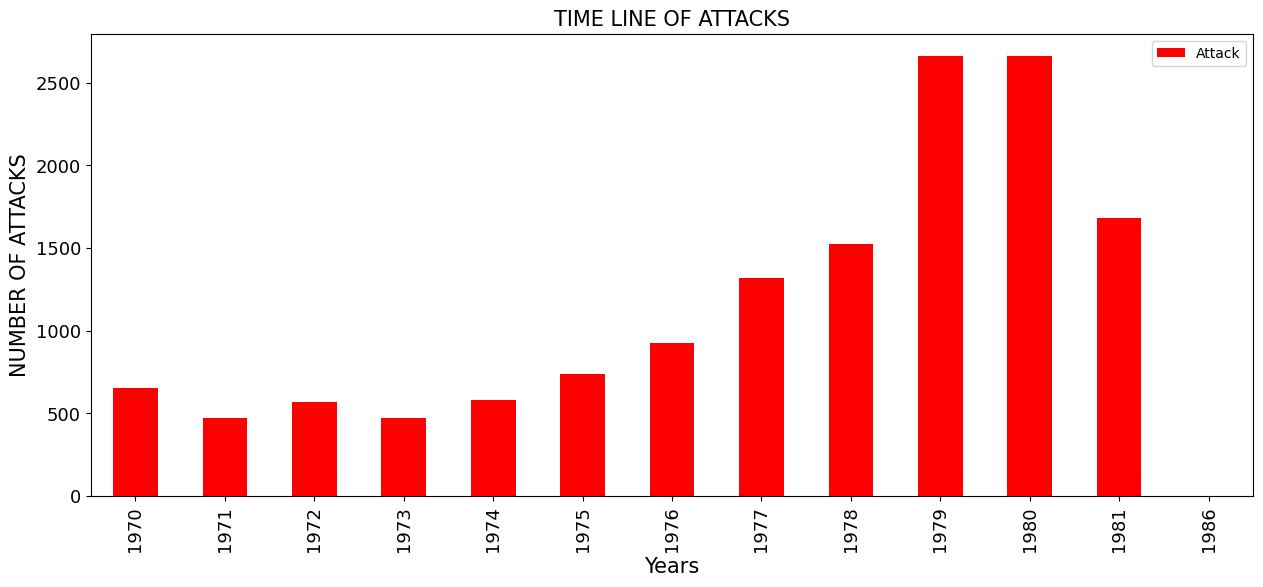

In [50]:

attacks.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("TIME LINE OF ATTACKS",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("NUMBER OF ATTACKS",fontsize=15)
plt.show()

In [51]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


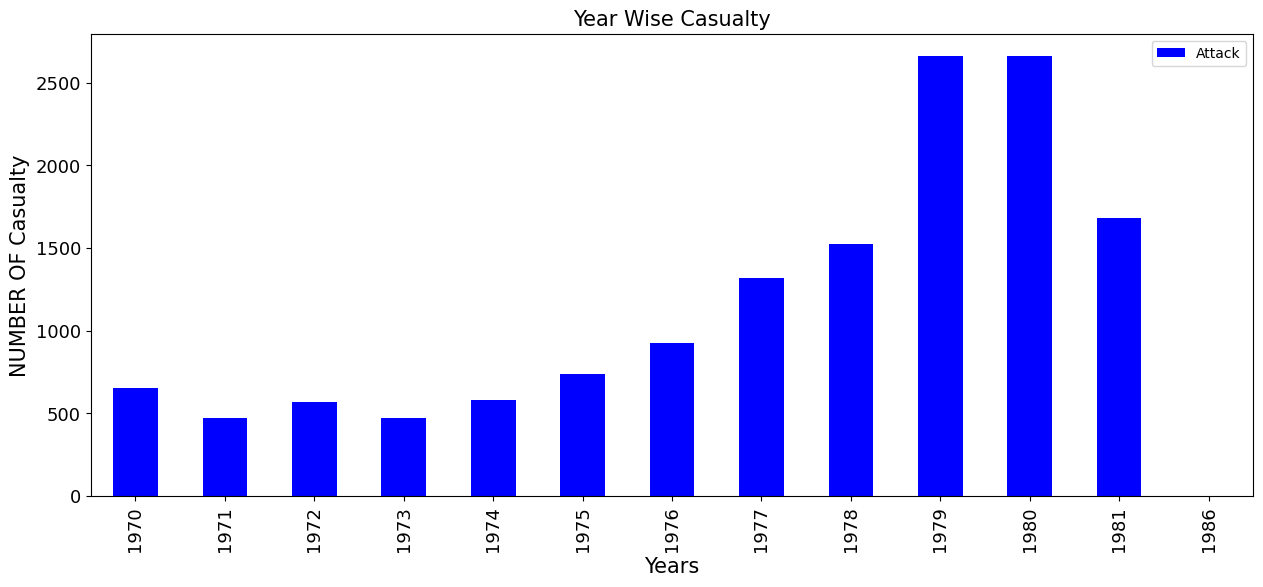

In [52]:
attacks.plot(kind="bar",color="Blue",figsize=(15,6),fontsize=13)
plt.title("Year Wise Casualty",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("NUMBER OF Casualty",fontsize=15)
plt.show()

Region wise **attacks**

In [54]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle Ea,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,2,12,0,28,472,65,1,10,3,50
1971,1,5,1,5,0,55,247,24,0,6,2,125
1972,8,3,0,1,0,53,73,33,1,16,4,376
1973,1,6,2,1,0,19,64,83,1,2,4,290
1974,1,11,4,2,0,42,111,81,2,3,7,317


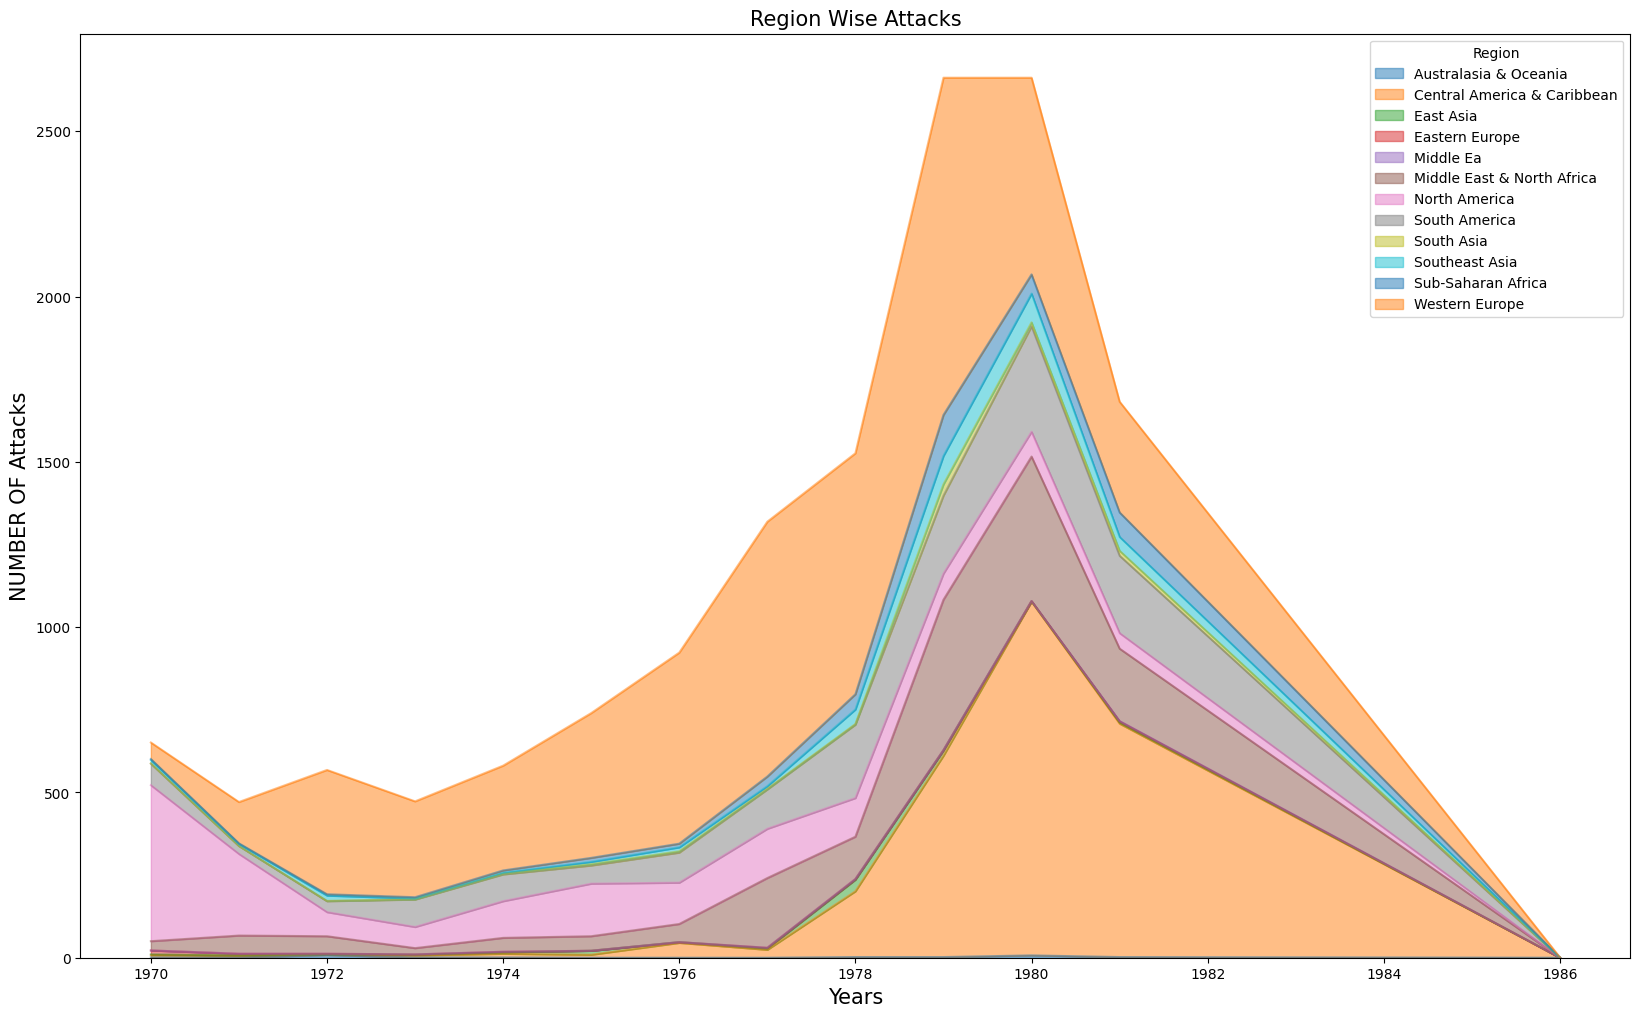

In [57]:
reg.plot(kind="area", stacked="false",alpha=0.5,figsize=(20,12))
plt.title("Region Wise Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("NUMBER OF Attacks",fontsize=15)
plt.show()

Total Casualty (killed+Wounded) in each region

In [61]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc.head()

,Casualty
Region,
Central America & Caribbean,7272.0
Western Europe,7249.0
Middle East & North Africa,5993.0
Southeast Asia,2998.0
South America,1615.0


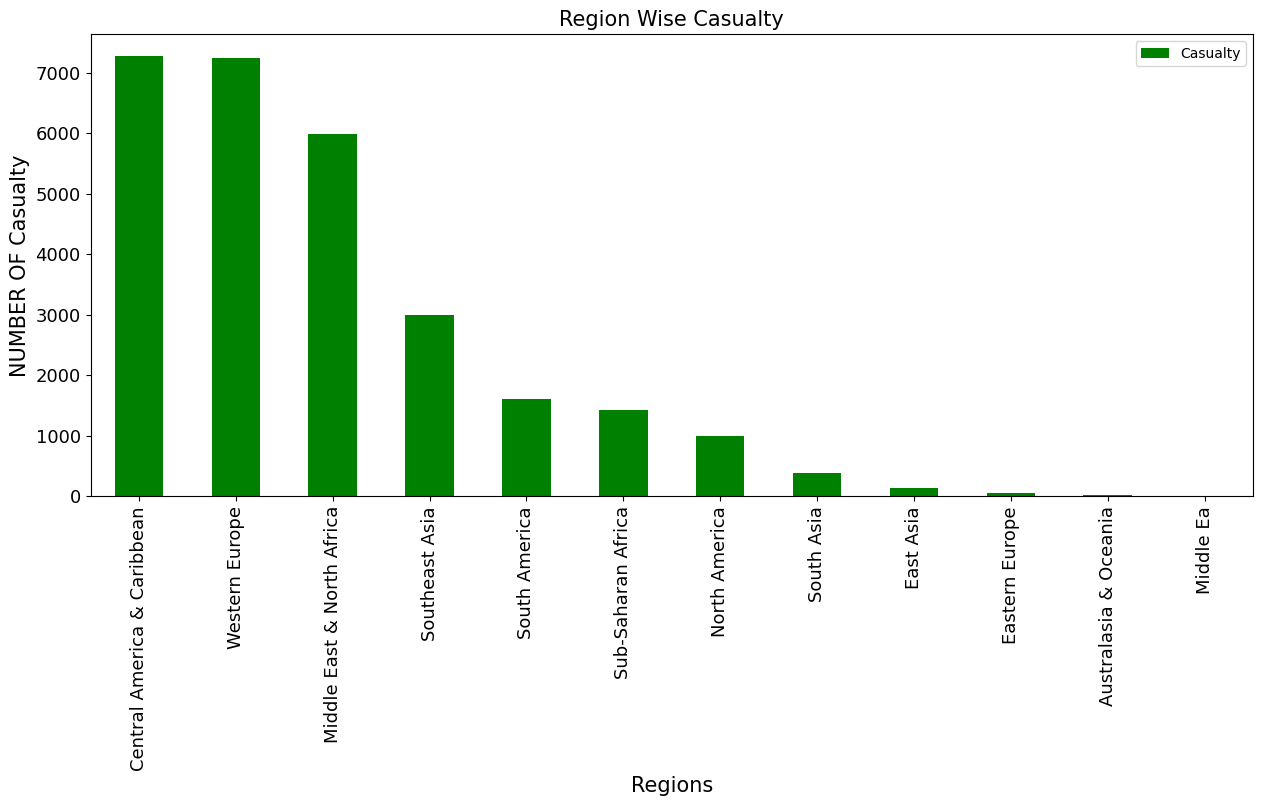

In [62]:
rc.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Region Wise Casualty",fontsize=15)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("NUMBER OF Casualty",fontsize=15)
plt.show()

**Country Wise attcaks**

In [63]:
ct=df["Country"].value_counts().head(10)
ct

United Kingdom    1861
United States     1587
El Salvador       1585
Italy             1181
Spain             1175
Colombia           659
Guatemala          632
France             612
Turkey             585
Nicaragua          345
Name: Country, dtype: int64

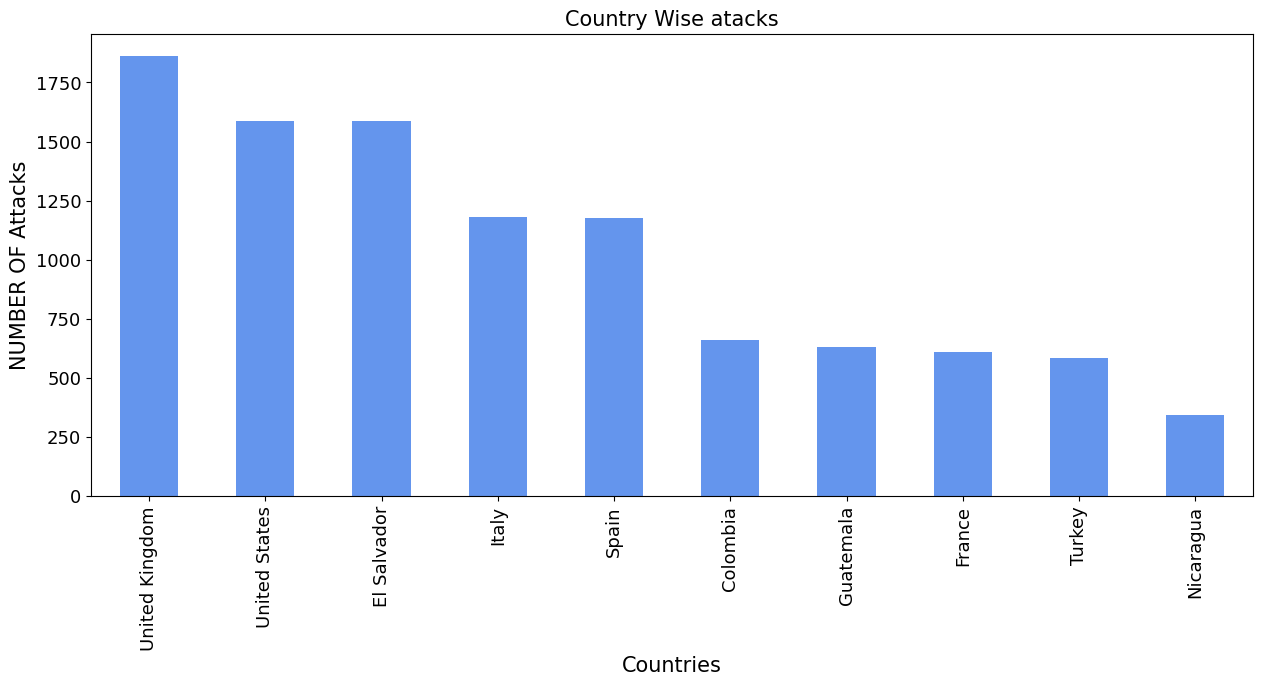

In [91]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Country Wise atacks",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("NUMBER OF Attacks",fontsize=15)
plt.show()

In [66]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
El Salvador,4654.0
United Kingdom,3299.0
Philippines,1955.0
Guatemala,1804.0
Iran,1616.0
Israel,1387.0
Spain,1314.0
Italy,1095.0
Lebanon,978.0


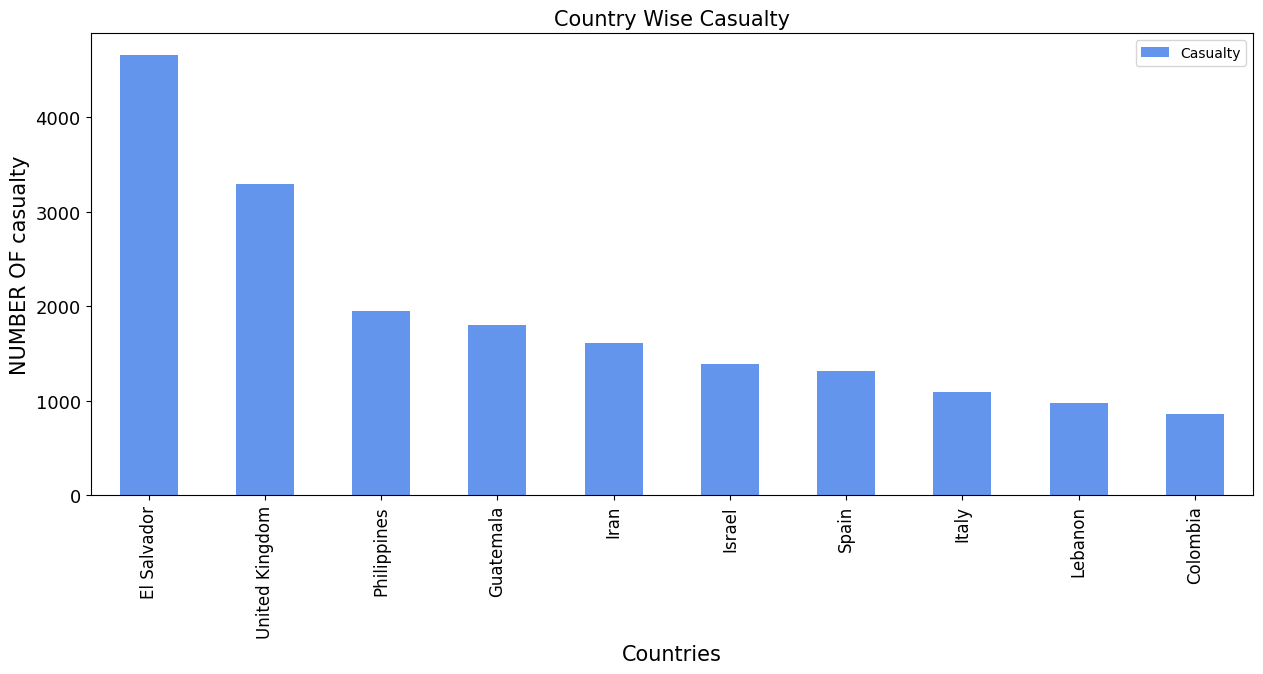

In [67]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Country Wise Casualty",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF casualty",fontsize=15)
plt.show()

killed  in each country

In [76]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
El Salvador,3956.0
United Kingdom,1896.0
Guatemala,1460.0
Iran,734.0
Colombia,691.0
Philippines,664.0
Spain,467.0
Nicaragua,422.0
Argentina,328.0


In [70]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
United Kingdom,1403.0
Philippines,1291.0
Israel,1118.0
Iran,882.0
Spain,847.0
Italy,777.0
El Salvador,698.0
Lebanon,685.0
United States,655.0


Text(0, 0.5, 'NUMBER OF People Wounded')

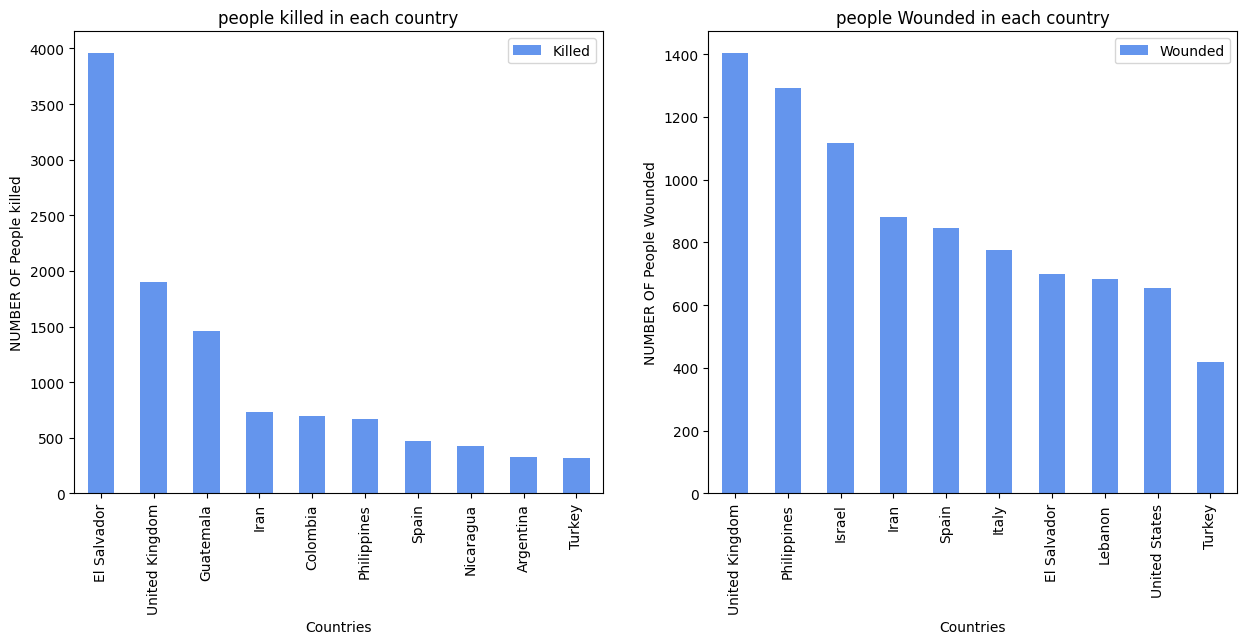

In [78]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("people killed in each country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("NUMBER OF People killed")

#wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("people Wounded in each country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("NUMBER OF People Wounded")


**city wise attcks**

In [79]:
city=df["City"].value_counts()[1:11]
city

San Salvador      735
Unknown           646
Rome              429
New York City     346
Paris             323
Guatemala City    269
Madrid            221
Buenos Aires      208
Istanbul          186
Beirut            183
Name: City, dtype: int64

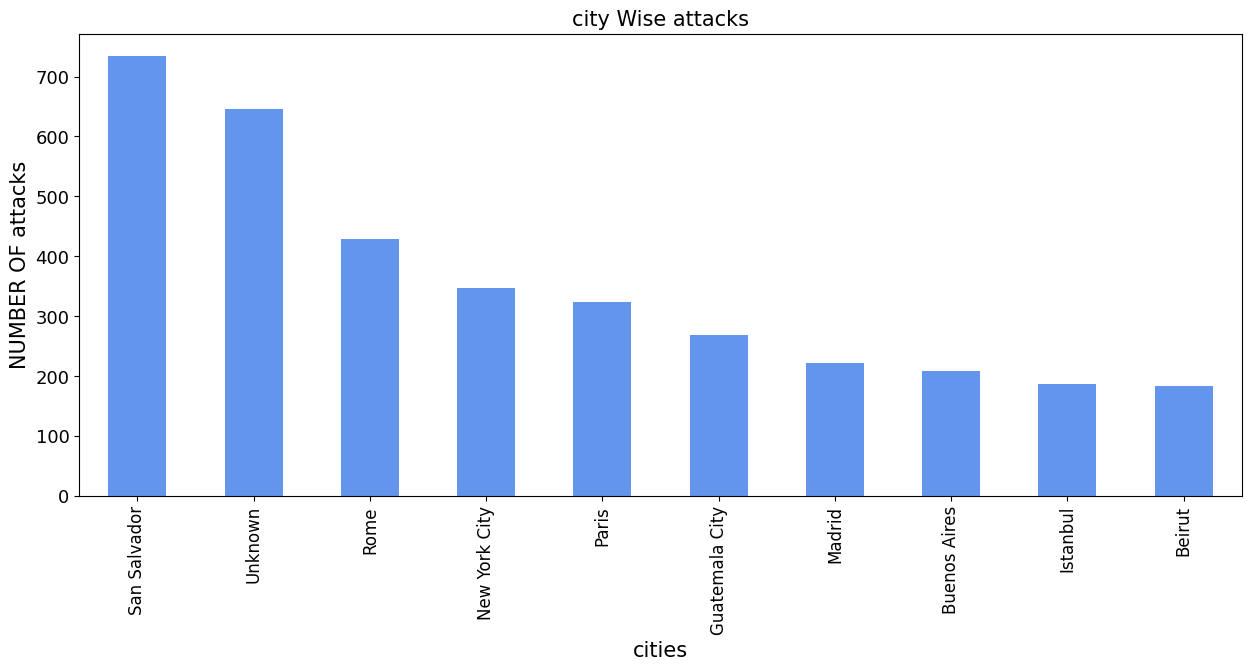

In [81]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("city Wise attacks",fontsize=15)
plt.xlabel("cities",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF attacks",fontsize=15)
plt.show()

total Casualties (killed+Wounded) in each city

In [87]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Belfast,1260.0
San Salvador,785.0
Beirut,722.0
Guatemala City,571.0
London,558.0
Jerusalem,525.0
Abadan,492.0
Tehran,476.0
Madrid,438.0


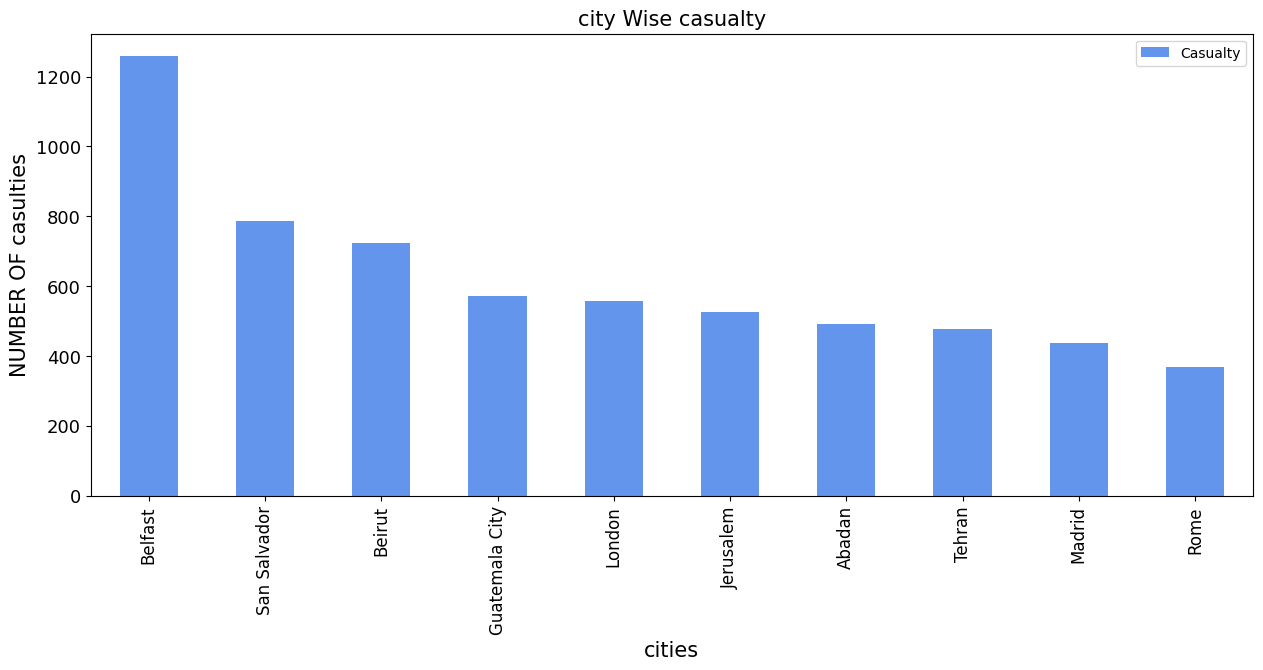

In [90]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("city Wise casualty",fontsize=15)
plt.xlabel("cities",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF casulties",fontsize=15)
plt.show()

killed in each city


In [92]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Belfast,938.0
San Salvador,581.0
Abadan,429.0
Guatemala City,378.0
Suchitoto,317.0
Beirut,230.0
Buenos Aires,226.0
Aleppo,193.0
San Vicente,164.0


In [93]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
London,517.0
Beirut,492.0
Jerusalem,484.0
Madrid,337.0
Belfast,322.0
Tehran,315.0
Baghdad,294.0
New York City,271.0
Istanbul,247.0


Text(0, 0.5, 'NUMBER OF People Wounded')

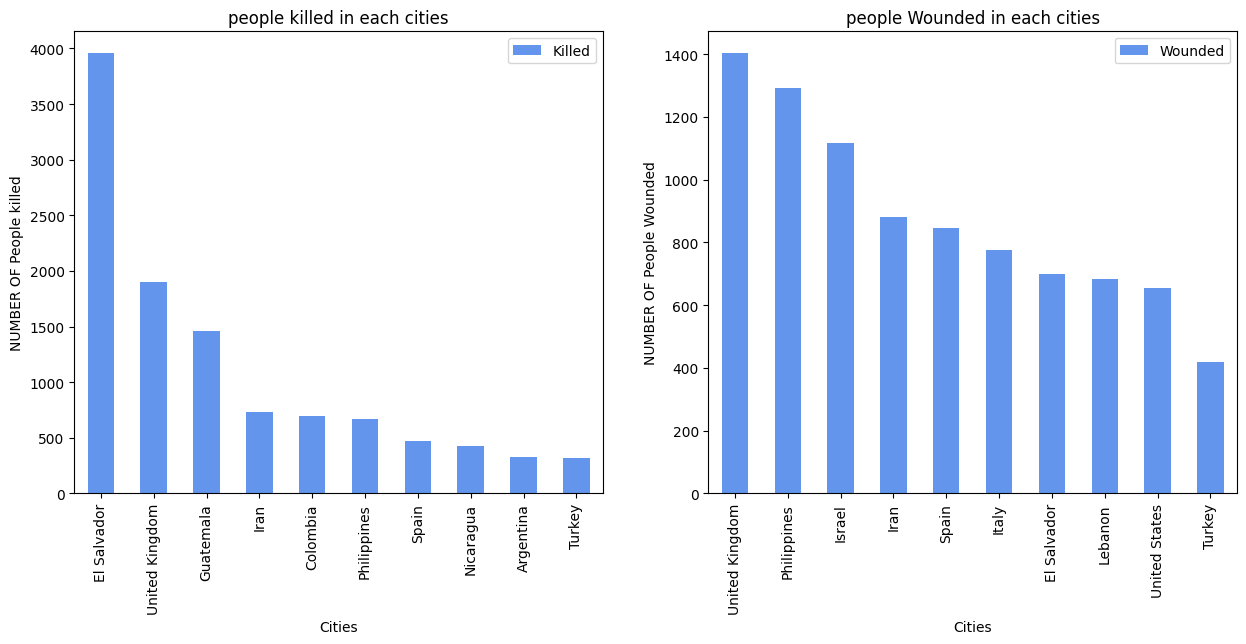

In [95]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("people killed in each cities")
ax0.set_xlabel("Cities")
ax0.set_ylabel("NUMBER OF People killed")

#wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("people Wounded in each cities")
ax1.set_xlabel("Cities")
ax1.set_ylabel("NUMBER OF People Wounded")

Terrorist Group Wise Attacks_top10

In [96]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                         1183
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         265
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Revolutionary Armed Forces of Colombia (FARC)        175
Ulster Volunteer Force (UVF)                         175
Name: Group Name, dtype: int64

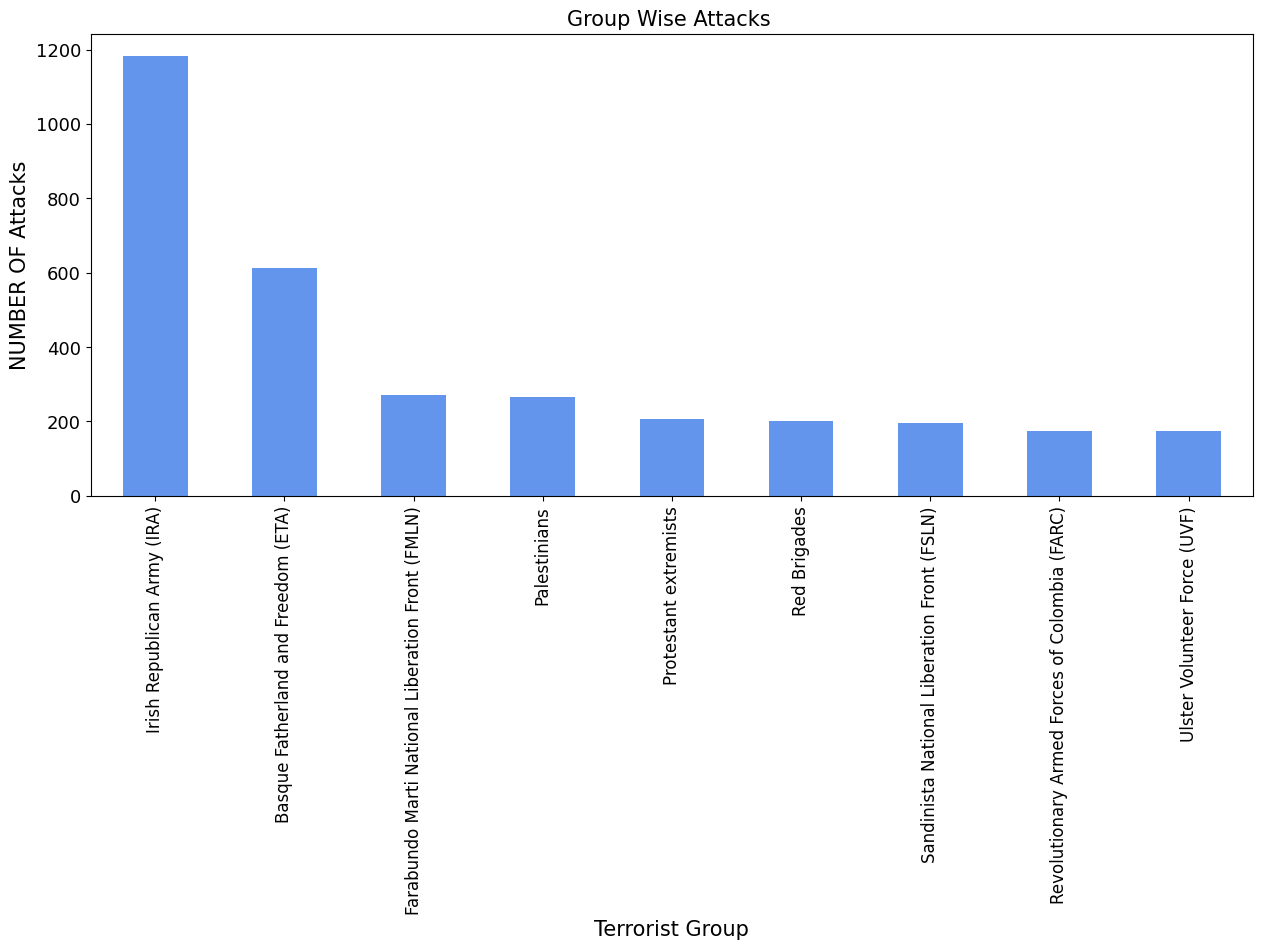

In [98]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Group Wise Attacks ",fontsize=15)
plt.xlabel("Terrorist Group",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF Attacks",fontsize=15)
plt.show()

casualty

In [99]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Irish Republican Army (IRA),2410.0
Farabundo Marti National Liberation Front (FMLN),1258.0
Basque Fatherland and Freedom (ETA),907.0
Moro National Liberation Front (MNLF),787.0
Palestinians,747.0
Mujahedin-e Khalq (MEK),479.0
Popular Front for the Liberation of Palestine (PFLP),457.0
Revolutionary Armed Forces of Colombia (FARC),424.0
Sandinista National Liberation Front (FSLN),366.0


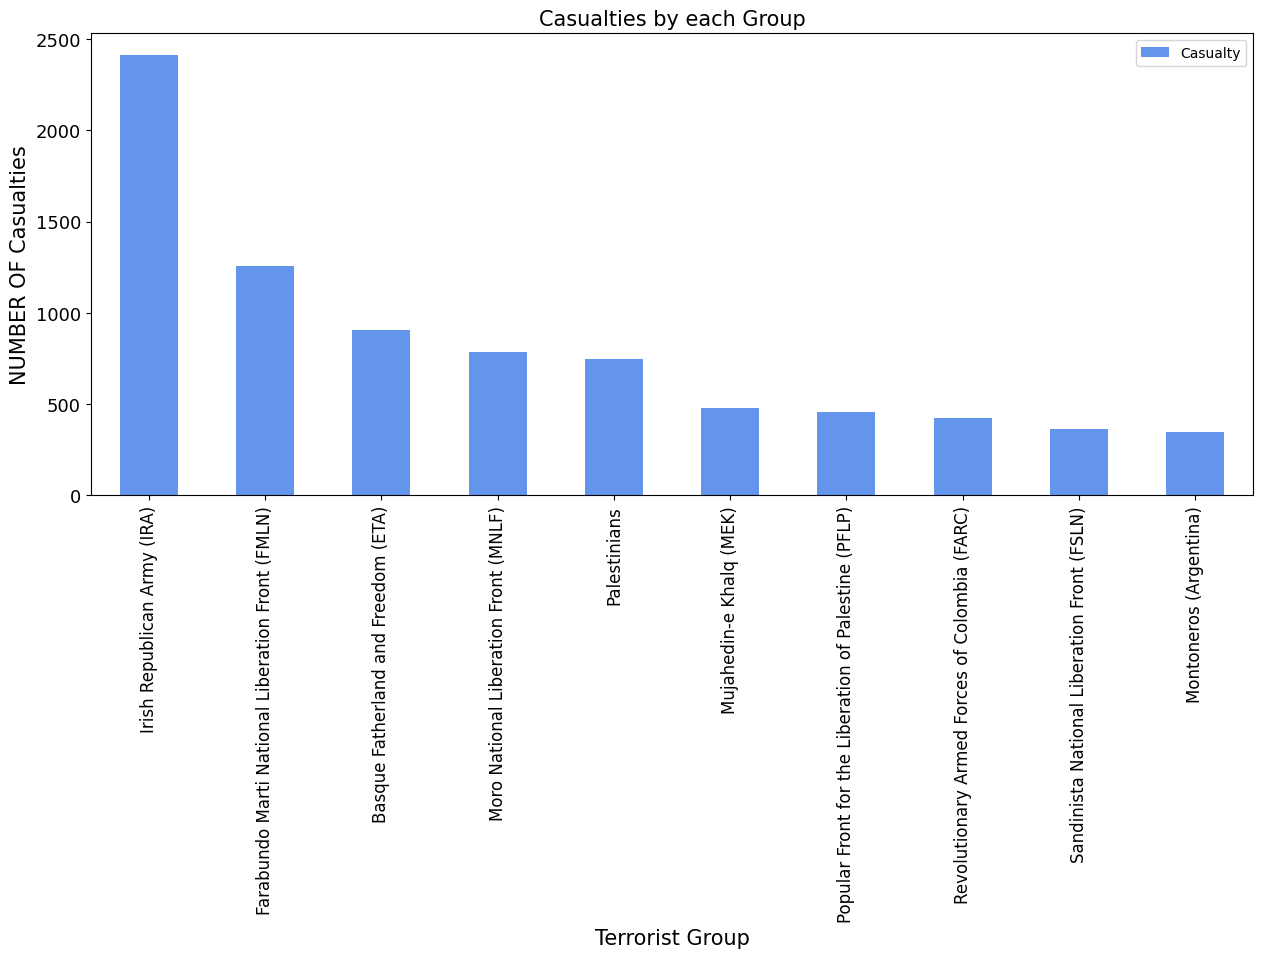

In [100]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Casualties by each Group",fontsize=15)
plt.xlabel("Terrorist Group",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("NUMBER OF Casualties",fontsize=15)
plt.show()

killed by each group

In [102]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Irish Republican Army (IRA),1111.0
Farabundo Marti National Liberation Front (FMLN),1016.0
Mujahedin-e Khalq (MEK),459.0
Revolutionary Armed Forces of Colombia (FARC),353.0
Basque Fatherland and Freedom (ETA),320.0
Moro National Liberation Front (MNLF),312.0
Ulster Volunteer Force (UVF),286.0
Guerrilla Army of the Poor (EGP),281.0
Sandinista National Liberation Front (FSLN),241.0


In [104]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1299.0
Palestinians,643.0
Basque Fatherland and Freedom (ETA),587.0
Moro National Liberation Front (MNLF),475.0
Popular Front for the Liberation of Palestine (PFLP),374.0
Farabundo Marti National Liberation Front (FMLN),242.0
Armed Revolutionary Nuclei (NAR),242.0
Neo-Nazi extremists,227.0
New People's Army (NPA),202.0


Text(0, 0.5, 'NUMBER OF People Wounded')

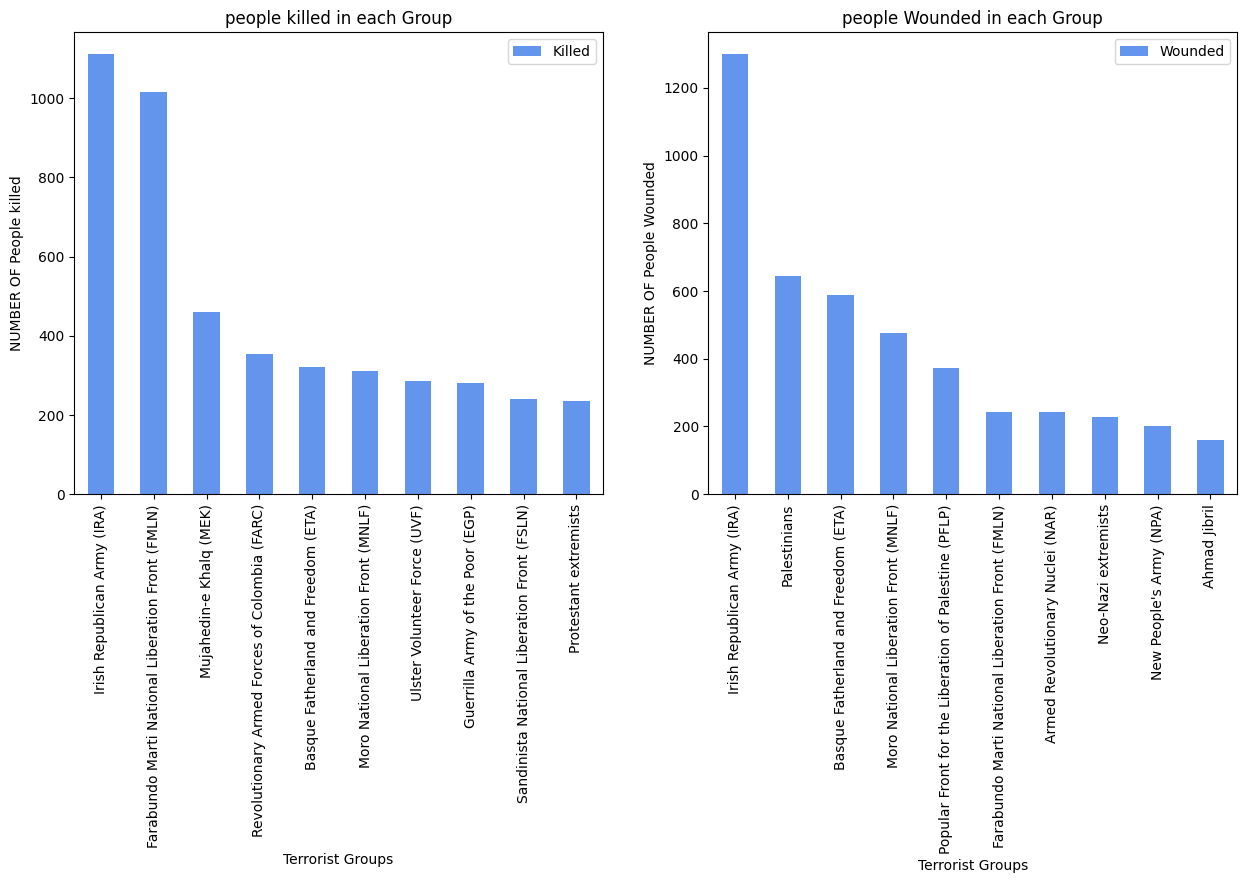

In [106]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("people killed in each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("NUMBER OF People killed")

#wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("people Wounded in each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("NUMBER OF People Wounded")